# Algoritmos de ordenamiento

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import sys

## Definición función `merge_sort`

In [15]:
def merge(left: np.array, right: np.array) -> np.array:
    res = list()
    while len(left) > 0 and len(right) > 0:
        if left[0] <= right[0]:
            res = np.append(res, left[0])
            left = np.delete(left, 0)
        else:
            res = np.append(res, right[0])
            right = np.delete(right, 0)
    if len(left) == 0:
        return np.append(res, right)
    else:
        return np.append(res, left)


def merge_sort(arr: np.array) -> np.array:
    size = len(arr)
    if size < 2:
        return arr
    left, right =  arr[:size // 2], arr[size // 2:]
    left = merge_sort(left)
    right = merge_sort(right)
    return merge(left, right)


## Definición función `quick_sort`

In [16]:
def partition(arr: np.array, low: int, high: int) -> int:
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_sort(arr: np.array, low: int, high: int):
    if low < high:
        p = partition(arr, low, high)
        quick_sort(arr, low, p - 1)
        quick_sort(arr, p + 1, high)

## Medir los tiempos de los distintos algoritmos

In [17]:
sys.setrecursionlimit(1_000_000)

In [18]:
LIMIT = 6
SEP = '\t\t'
problem_size = np.array([10 ** i for i in range(1, LIMIT + 1)])
ms_times = list()
qs_times = list()
np_times = list()

print(*'size,numpy quick sort,merge sort      ,quick sort'.split(','), sep= SEP)

for i in problem_size:
    array = np.random.randint(1, i, i)


    print(i, end= SEP)
    start = time.time()
    np.sort(array)
    np_times.append(time.time() - start)
    print(np_times[-1], end= SEP)

    start = time.time()
    merge_sort(array)
    ms_times.append(time.time() - start)
    print(ms_times[-1], end= SEP)

    start = time.time()
    quick_sort(array, 0, len(array) - 1)
    qs_times.append(time.time() - start)
    print(qs_times[-1])

size		numpy quick sort		merge sort      		quick sort
10		2.5272369384765625e-05		0.0010571479797363281		3.4809112548828125e-05
100		2.4318695068359375e-05		0.010876655578613281		0.0003974437713623047
1000		7.104873657226562e-05		0.20188426971435547		0.007600545883178711
10000		0.0008094310760498047		1.7953672409057617		0.08376431465148926
100000		0.009054183959960938		29.630806922912598		1.084165334701538
1000000		0.08699989318847656		1928.8785026073456		8.910407304763794


Para problemas de tamaño $10^7$ y $10^8$ nuestras implementaciones de `merge_sort` y `quick_sort` tardan demasiado por eso nos saltaremos esos pasos y solo ejecutaremos `np.sort`.

In [19]:
for i in range(7,9):
    n = 10 ** i
    problem_size = np.append(problem_size, n)
    array = np.random.randint(1, n, n)
    start = time.time()
    np.sort(array)
    np_times.append(time.time() - start)
    ms_times.append(np.nan)
    qs_times.append(np.nan)

Guardar los tiempos en un data frame 

In [33]:
times_df = pd.DataFrame({
    'Tamaño del problema': problem_size,
    'MiMergeSort': ms_times,
    'MiQuickSort': qs_times,
    'NumpySort': np_times 
})
times_df

,Tamaño del problema,MiMergeSort,MiQuickSort,NumpySort
0,10,0.001057,0.000035,0.000025
1,100,0.010877,0.000397,0.000024
2,1000,0.201884,0.007601,0.000071
3,10000,1.795367,0.083764,0.000809
4,100000,29.630807,1.084165,0.009054
5,1000000,1928.878503,8.910407,0.087000
6,10000000,NaN,NaN,0.714513
7,100000000,NaN,NaN,10.033744


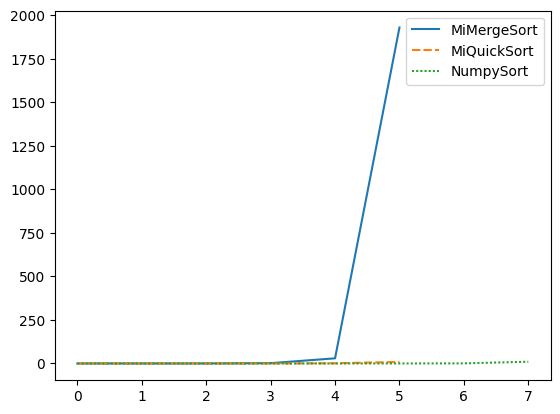

In [34]:
sns.lineplot(
    data= times_df[['MiMergeSort','MiQuickSort','NumpySort']],
    # x= '#problems',
    # y= ['merge', 'quick', 'numpy'],
    legend= True
)
!clear

In [37]:
with pd.ExcelWriter("TiemposOrdenamiento.xlsx") as writer:
    times_df.to_excel(writer, sheet_name='Hoja1')